In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import chardet

# Configuração para os gráficos ficarem mais bonitos
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
path_raw = "../data/raw/"

def read_csv_auto(path):
    try:
        return pd.read_csv(path, encoding='utf-8')
    except UnicodeDecodeError:
        with open(path, 'rb') as f:
            enc = chardet.detect(f.read())['encoding']
        print(f"→ Detectado encoding para {path.split('/')[-1]}: {enc}")
        return pd.read_csv(path, encoding=enc)

df_consumo = read_csv_auto(path_raw + "consumo_historico_por_regiao.csv")
df_pop = read_csv_auto(path_raw + "crescimento_populacional_regioes_2020_2024.csv")
df_clima = read_csv_auto(path_raw + "medias_temperatura_umidade_2024.csv")

→ Detectado encoding para consumo_historico_por_regiao.csv: UTF-16


In [3]:
print("--- Consumo Histórico ---")
print(df_consumo.head()) # Mostra as 5 primeiras linhas
print("\nInformações:")
df_consumo.info() # Mostra os tipos de colunas (data, número, texto)

print("\n--- Crescimento Populacional ---")
print(df_pop.head())
print("\nInformações:")
df_pop.info()

print("\n--- Clima 2024 ---")
print(df_clima.head())
print("\nInformações:")
df_clima.info()

--- Consumo Histórico ---
                                                    Data\tClasse\tAmbiente\tRamo de atividade\tSubmercado\tEstado\tStatus Migracao\tConsumo (MWm)
31/12/2024\tDistribuidor\tACR\tACR\tNordeste\tA...                                                962                                            
31/12/2024\tDistribuidor\tACR\tACR\tNordeste\tB...                                                865                                            
31/12/2024\tDistribuidor\tACR\tACR\tNordeste\tC...                                                289                                            
31/12/2024\tDistribuidor\tACR\tACR\tNordeste\tP...                                                680                                            
31/12/2024\tDistribuidor\tACR\tACR\tNordeste\tP...                                                813                                            

Informações:
<class 'pandas.core.frame.DataFrame'>
Index: 9663 entries, 31/12/2024	Distribuidor	A

In [10]:
# --- Função auxiliar para detectar encoding ---
def detectar_encoding(caminho_arquivo, n_bytes=10000):
    """Detecta automaticamente o encoding de um arquivo"""
    with open(caminho_arquivo, 'rb') as f:
        resultado = chardet.detect(f.read(n_bytes))
    return resultado['encoding']

# --- Detectar base do projeto ---
# Se __file__ não existir (ex: em Jupyter), usa o diretório atual
try:
    BASE_DIR = Path(__file__).resolve().parent.parent
except NameError:
    BASE_DIR = Path(os.getcwd()).resolve().parent  # sobe 1 nível a partir do notebook
    print(f"Executando no Jupyter. Diretório base detectado: {BASE_DIR}")

DATA_DIR = BASE_DIR / "data" / "raw"

# --- Lista de arquivos ---
arquivos = {
    "consumo": DATA_DIR / "consumo_historico_por_regiao.csv",
    "pop": DATA_DIR / "crescimento_populacional_regioes_2020_2024.csv",
    "clima": DATA_DIR / "medias_temperatura_umidade_2024.csv"
}

# --- Leitura dos arquivos reais ---
dfs = {}
for nome, caminho in arquivos.items():
    encoding_detectado = detectar_encoding(caminho)
    print(f"Lendo {caminho.name} (encoding detectado: {encoding_detectado})")
    dfs[nome] = pd.read_csv(
        caminho,
        sep='|',
        encoding=encoding_detectado or 'utf-16-le',
        decimal=','
    )

# --- Atribuições para facilitar o uso ---
df_consumo = dfs["consumo"]
df_pop = dfs["pop"]
df_clima = dfs["clima"]

# --- Exibição das informações ---
print("\n--- Consumo Histórico ---")
print(df_consumo.head())
print("\nInformações:")
df_consumo.info()

print("\n--- Crescimento Populacional ---")
print(df_pop.head())
print("\nInformações:")
df_pop.info()

print("\n--- Clima 2024 ---")
print(df_clima.head())
print("\nInformações:")
df_clima.info()

Executando no Jupyter. Diretório base detectado: /home/jeanzin/peaksense
Lendo consumo_historico_por_regiao.csv (encoding detectado: UTF-16)
Lendo crescimento_populacional_regioes_2020_2024.csv (encoding detectado: utf-8)
Lendo medias_temperatura_umidade_2024.csv (encoding detectado: utf-8)

--- Consumo Histórico ---
  Data\tClasse\tAmbiente\tRamo de atividade\tSubmercado\tEstado\tStatus Migracao\tConsumo (MWm)
0  31/12/2024\tDistribuidor\tACR\tACR\tNordeste\t...                                           
1  31/12/2024\tDistribuidor\tACR\tACR\tNordeste\t...                                           
2  31/12/2024\tDistribuidor\tACR\tACR\tNordeste\t...                                           
3  31/12/2024\tDistribuidor\tACR\tACR\tNordeste\t...                                           
4  31/12/2024\tDistribuidor\tACR\tACR\tNordeste\t...                                           

Informações:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9663 entries, 0 to 9662
Data columns (tot

In [12]:
# --- Configuração de Caminhos (igual ao que você fez) ---
try:
    BASE_DIR = Path(__file__).resolve().parent.parent
except NameError:
    BASE_DIR = Path(os.getcwd()).resolve() # Jupyter notebook está em /notebooks, então subimos 1 nível
    print(f"Executando no Jupyter. Diretório base detectado: {BASE_DIR}")

DATA_DIR = BASE_DIR / "data" / "raw"

Executando no Jupyter. Diretório base detectado: /home/jeanzin/peaksense/notebooks


In [16]:
from pathlib import Path
import pandas as pd

# Caminho base (sobe um nível para sair de notebooks/)
BASE_DIR = Path.cwd().parent
DATA_DIR = BASE_DIR / "data" / "raw"

print(f"Base detectada: {BASE_DIR}")
print(f"Pasta de dados: {DATA_DIR}")

# --- Bloco 2 (Corrigido): Carregando os dados corretamente ---

print("\n--- Carregando df_consumo ---")
try:
    df_consumo = pd.read_csv(
        DATA_DIR / "consumo_historico_por_regiao.csv",
        sep='\t',            # O separador é TAB
        encoding='utf-16',   # O encoding que você descobriu
        decimal=','          # Decimal para números (ex: 123,45)
    )
    print("Sucesso!")
except Exception as e:
    print(f"Erro ao ler df_consumo: {e}")

print("\n--- Carregando df_pop ---")
try:
    df_pop = pd.read_csv(
        DATA_DIR / "crescimento_populacional_regioes_2020_2024.csv",
        sep=',',             # O separador é VÍRGULA
        encoding='utf-8',    # O encoding que você descobriu
        decimal=','
    )
    # Remove linhas 'Brasil' ou 'Total'
    df_pop = df_pop[~df_pop['Região'].str.contains('Brasil|Total', case=False, na=False)]
    print("Sucesso!")
except Exception as e:
    print(f"Erro ao ler df_pop: {e}")

print("\n--- Carregando df_clima ---")
try:
    df_clima = pd.read_csv(
        DATA_DIR / "medias_temperatura_umidade_2024.csv",
        sep=',',             # O separador é VÍRGULA
        encoding='utf-8',    # O encoding que você descobriu
        decimal=','
    )
    print("Sucesso!")
except Exception as e:
    print(f"Erro ao ler df_clima: {e}")

Base detectada: /home/jeanzin/peaksense
Pasta de dados: /home/jeanzin/peaksense/data/raw

--- Carregando df_consumo ---
Sucesso!

--- Carregando df_pop ---
Sucesso!

--- Carregando df_clima ---
Sucesso!


In [17]:
# --- Bloco 3: "Espiar" os dados (A HORA DA VERDADE) ---
# Vamos verificar se as variáveis df_consumo, df_pop, e df_clima existem
# e o que há dentro delas.

print("--- Verificando df_consumo ---")
try:
    print(df_consumo.head()) # Mostra as 5 primeiras linhas
    print("\nInformações:")
    df_consumo.info() # Mostra os tipos de colunas (data, número, texto)
except NameError:
    print("ERRO: A variável 'df_consumo' não foi criada.")
except Exception as e:
    print(f"Um erro inesperado ocorreu com df_consumo: {e}")

print("\n\n--- Verificando df_pop ---")
try:
    print(df_pop.head())
    print("\nInformações:")
    df_pop.info()
except NameError:
    print("ERRO: A variável 'df_pop' não foi criada.")
except Exception as e:
    print(f"Um erro inesperado ocorreu com df_pop: {e}")

print("\n\n--- Verificando df_clima ---")
try:
    print(df_clima.head())
    print("\nInformações:")
    df_clima.info()
except NameError:
    print("ERRO: A variável 'df_clima' não foi criada.")
except Exception as e:
    print(f"Um erro inesperado ocorreu com df_clima: {e}")

--- Verificando df_consumo ---
         Data        Classe Ambiente Ramo de atividade Submercado  \
0  31/12/2024  Distribuidor      ACR               ACR   Nordeste   
1  31/12/2024  Distribuidor      ACR               ACR   Nordeste   
2  31/12/2024  Distribuidor      ACR               ACR   Nordeste   
3  31/12/2024  Distribuidor      ACR               ACR   Nordeste   
4  31/12/2024  Distribuidor      ACR               ACR   Nordeste   

        Estado Status Migracao Consumo (MWm)  
0     Alagoas        Existente       493,962  
1       Bahia        Existente     2.331,865  
2        Ceará       Existente     1.532,289  
3      Paraíba       Existente       681,680  
4  Pernambuco        Existente     1.531,813  

Informações:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9663 entries, 0 to 9662
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Data               9663 non-null   object
 1   Classe

In [18]:
import numpy as np # Vamos precisar dele para uma coisinha

print("--- Iniciando Limpeza e Preparação ---")

# --- 1. Limpando df_consumo ---
print("Limpando df_consumo...")
try:
    # 1.1. Limpar e converter 'Consumo (MWm)'
    # Original: '2.331,865' (object) -> Queremos: 2331.865 (float)
    
    # Primeiro, removemos o '.' (separador de milhar)
    df_consumo['Consumo_Limpo'] = df_consumo['Consumo (MWm)'].str.replace('.', '', regex=False)
    # Segundo, trocamos a ',' (decimal) por '.'
    df_consumo['Consumo_Limpo'] = df_consumo['Consumo_Limpo'].str.replace(',', '.', regex=False)
    # Terceiro, convertemos para número. 'coerce' transforma erros em 'NaN' (Nulo)
    df_consumo['Consumo_Limpo'] = pd.to_numeric(df_consumo['Consumo_Limpo'], errors='coerce')

    # 1.2. Converter 'Data' para formato de data
    df_consumo['Data'] = pd.to_datetime(df_consumo['Data'], format='%d/%m/%Y')
    
    # 1.3. Extrair 'Ano' e 'Mes_Num' (vai ser útil para juntar)
    df_consumo['Ano'] = df_consumo['Data'].dt.year
    df_consumo['Mes_Num'] = df_consumo['Data'].dt.month
    
    # 1.4. Renomear 'Submercado' para 'Região' para padronizar
    df_consumo = df_consumo.rename(columns={'Submercado': 'Região'})

    # 1.5. Limpar espaços extras em 'Região' (ex: 'Alagoas ' vira 'Alagoas')
    df_consumo['Região'] = df_consumo['Região'].str.strip()
    
    # 1.6. === O MAIS IMPORTANTE ===
    # Seus dados de consumo estão por ESTADO. Seus dados de clima/pop estão por REGIÃO.
    # Precisamos AGREGAR (somar) o consumo de todos os estados por Região e Data.
    print("Agregando consumo por Região e Data...")
    
    # Agrupa por Data e Região, e soma o consumo
    df_consumo_agg = df_consumo.groupby(['Data', 'Região', 'Ano', 'Mes_Num'])['Consumo_Limpo'].sum().reset_index()

    print("✅ df_consumo limpo e agregado!")
    print(df_consumo_agg.head())
    df_consumo_agg.info()

except Exception as e:
    print(f"❌ ERRO ao limpar df_consumo: {e}")


# --- 2. Limpando df_clima ---
print("\nLimpando df_clima...")
try:
    # 2.1. Converter 'Temperatura (°C)' e 'Umidade (%)'
    # Original: '25.7' (object) -> Queremos: 25.7 (float)
    # O read_csv não converteu, então trocamos vírgula por ponto (só por garantia)
    df_clima['Temperatura'] = df_clima['Temperatura (°C)'].str.replace(',', '.', regex=False)
    df_clima['Umidade'] = df_clima['Umidade (%)'].str.replace(',', '.', regex=False)
    
    # Convertemos para número
    df_clima['Temperatura'] = pd.to_numeric(df_clima['Temperatura'], errors='coerce')
    df_clima['Umidade'] = pd.to_numeric(df_clima['Umidade'], errors='coerce')

    # 2.2. Mapear 'Mês' (texto) para número (Mês_Num)
    mapa_meses = {
        'Janeiro': 1, 'Fevereiro': 2, 'Março': 3, 'Abril': 4,
        'Maio': 5, 'Junho': 6, 'Julho': 7, 'Agosto': 8,
        'Setembro': 9, 'Outubro': 10, 'Novembro': 11, 'Dezembro': 12
    }
    df_clima['Mes_Num'] = df_clima['Mês'].map(mapa_meses)
    
    # 2.3. Adicionar Ano (sabemos que é 2024)
    df_clima['Ano'] = 2024
    
    # 2.4. Limpar espaços extras em 'Região'
    df_clima['Região'] = df_clima['Região'].str.strip()

    print("✅ df_clima limpo!")
    print(df_clima.head())
    df_clima.info()

except Exception as e:
    print(f"❌ ERRO ao limpar df_clima: {e}")


# --- 3. Limpando df_pop ---
print("\nLimpando df_pop...")
try:
    # 3.1. Converter 'Crescimento (%)'
    # Original: '3.05' (object) -> Queremos: 3.05 (float)
    df_pop['Crescimento_Float'] = df_pop['Crescimento (%)'].str.replace(',', '.', regex=False)
    df_pop['Crescimento_Float'] = pd.to_numeric(df_pop['Crescimento_Float'], errors='coerce')

    # 3.2. Limpar espaços extras em 'Região'
    df_pop['Região'] = df_pop['Região'].str.strip()
    
    print("✅ df_pop limpo!")
    print(df_pop.head())
    df_pop.info()
    
except Exception as e:
    print(f"❌ ERRO ao limpar df_pop: {e}")

print("\n--- Limpeza Concluída! ---")

--- Iniciando Limpeza e Preparação ---
Limpando df_consumo...
Agregando consumo por Região e Data...
✅ df_consumo limpo e agregado!
        Data                Região   Ano  Mes_Num  Consumo_Limpo
0 2024-01-01              Nordeste  2024        1       7277.322
1 2024-01-01                 Norte  2024        1       3318.403
2 2024-01-01  Sudeste/Centro-Oeste  2024        1      20294.203
3 2024-01-01                   Sul  2024        1       5919.036
4 2024-01-02              Nordeste  2024        1       7969.688
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Data           1436 non-null   datetime64[ns]
 1   Região         1436 non-null   object        
 2   Ano            1436 non-null   int32         
 3   Mes_Num        1436 non-null   int32         
 4   Consumo_Limpo  1436 non-null   float64       
dtypes: datetim

--- Iniciando Bloco 5: Harmonização e Análise ---
Harmonizando df_pop...
✅ df_pop harmonizado! Veja:
                 Região  População 2024
0                 Norte        18669345
1              Nordeste        57112096
2                   Sul        31113021
3  Sudeste/Centro-Oeste       105689288

Harmonizando df_clima...
✅ df_clima harmonizado!

--- Gerando Gráfico: Objetivo A (Consumo × População) ---

>> Correlação População x Consumo: 0.96


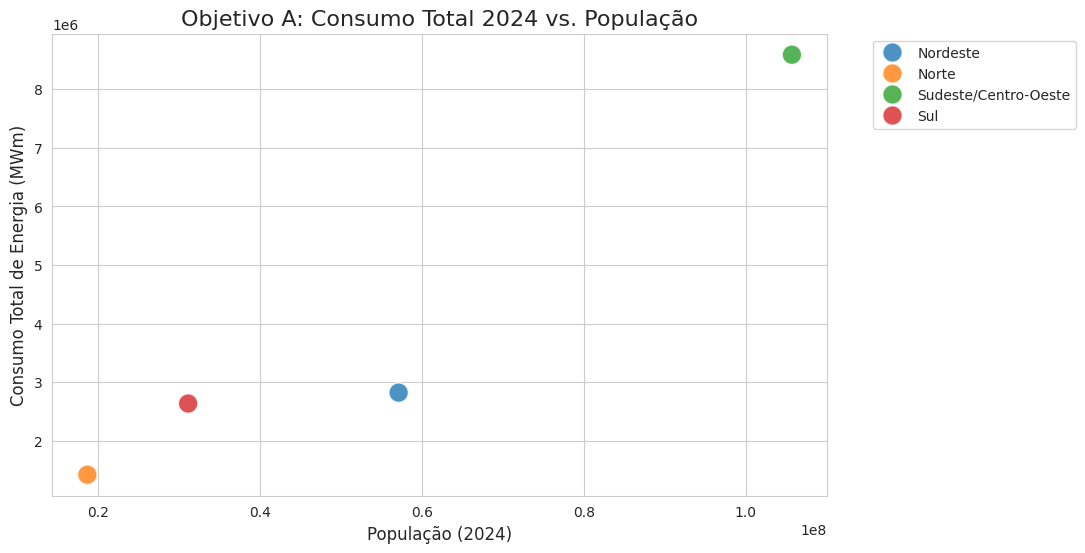


--- Gerando Gráfico: Objetivo B (Consumo × Clima) ---

>> Correlação Temp. x Consumo: -0.17
>> Correlação Umidade x Consumo: -0.19


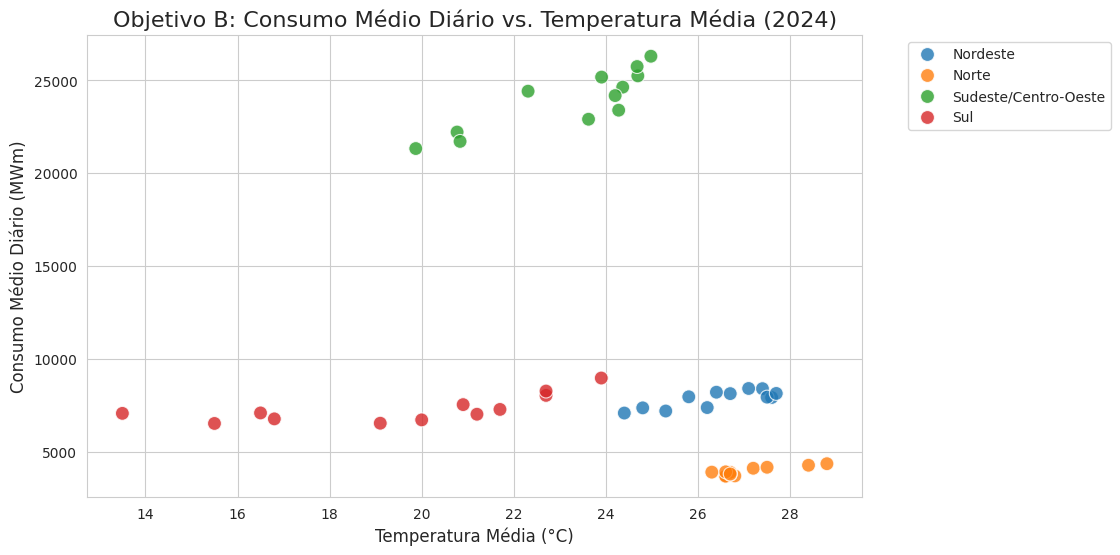

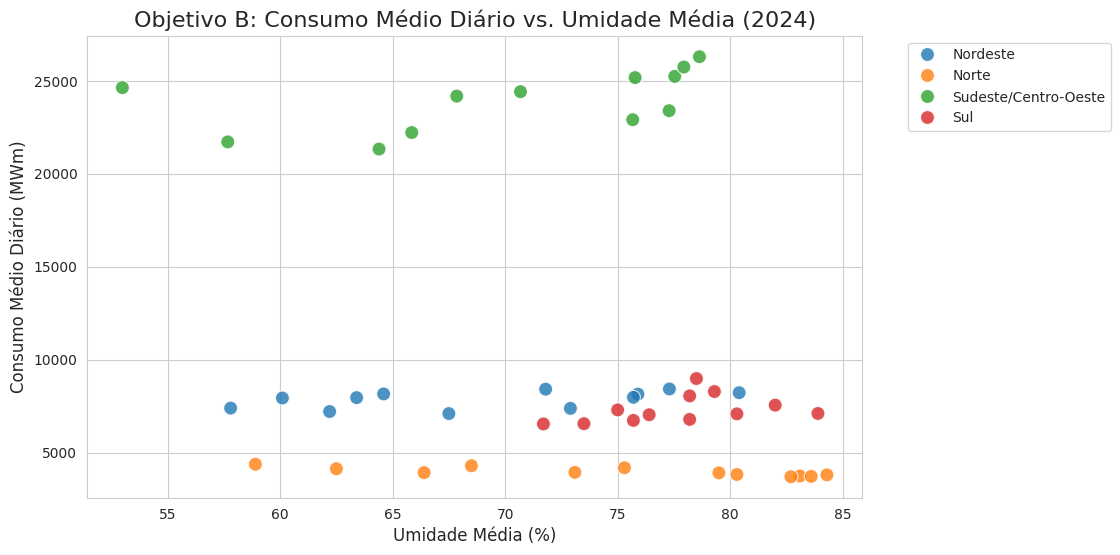


--- Análises A e B Concluídas! ---


In [19]:
import warnings
# Desativar avisos que podem poluir a saída (ex: SettingWithCopyWarning)
warnings.filterwarnings('ignore')

print("--- Iniciando Bloco 5: Harmonização e Análise ---")

# --- 1. HARMONIZAÇÃO (O "Conserto" das Regiões) ---

# --- 1.1. Harmonizando df_pop ---
print("Harmonizando df_pop...")
try:
    # Pegar os dados de 2024 de Sudeste e Centro-Oeste
    pop_se = df_pop[df_pop['Região'] == 'Sudeste']['População 2024'].iloc[0]
    pop_co = df_pop[df_pop['Região'] == 'Centro-Oeste']['População 2024'].iloc[0]
    
    # Criar a nova linha
    nova_linha_pop = {
        'Região': 'Sudeste/Centro-Oeste',
        'População 2024': pop_se + pop_co
    }
    
    # Criar o novo dataframe harmonizado
    # 1. Pega as regiões que NÃO são 'Sudeste' ou 'Centro-Oeste'
    df_pop_harmonizado = df_pop[~df_pop['Região'].isin(['Sudeste', 'Centro-Oeste'])].copy()
    
    # 2. Adiciona a nova linha 'Sudeste/Centro-Oeste'
    df_pop_harmonizado = pd.concat([df_pop_harmonizado, pd.DataFrame([nova_linha_pop])], ignore_index=True)

    print("✅ df_pop harmonizado! Veja:")
    print(df_pop_harmonizado[['Região', 'População 2024']])

except Exception as e:
    print(f"❌ ERRO ao harmonizar df_pop: {e}")


# --- 1.2. Harmonizando df_clima (Média Ponderada) ---
print("\nHarmonizando df_clima...")
try:
    # Precisamos das populações de 2024 para ponderar
    pop_lookup = df_pop.set_index('Região')['População 2024']
    pop_se_2024 = pop_lookup['Sudeste']
    pop_co_2024 = pop_lookup['Centro-Oeste']
    pop_total_seco = pop_se_2024 + pop_co_2024
    
    # Separar os dados de clima de SE e CO
    clima_se = df_clima[df_clima['Região'] == 'Sudeste'].set_index('Mes_Num')
    clima_co = df_clima[df_clima['Região'] == 'Centro-Oeste'].set_index('Mes_Num')
    
    # Calcular a média ponderada para cada mês
    temp_ponderada = (clima_se['Temperatura'] * pop_se_2024 + clima_co['Temperatura'] * pop_co_2024) / pop_total_seco
    umidade_ponderada = (clima_se['Umidade'] * pop_se_2024 + clima_co['Umidade'] * pop_co_2024) / pop_total_seco
    
    # Criar o novo dataframe para 'Sudeste/Centro-Oeste'
    df_clima_seco = pd.DataFrame({
        'Região': 'Sudeste/Centro-Oeste',
        'Mes_Num': temp_ponderada.index,
        'Temperatura': temp_ponderada.values,
        'Umidade': umidade_ponderada.values,
        'Ano': 2024
    })
    
    # Criar o dataframe final de clima harmonizado
    df_clima_harmonizado = df_clima[~df_clima['Região'].isin(['Sudeste', 'Centro-Oeste'])].copy()
    df_clima_harmonizado = pd.concat([df_clima_harmonizado, df_clima_seco], ignore_index=True)

    print("✅ df_clima harmonizado!")

except Exception as e:
    print(f"❌ ERRO ao harmonizar df_clima: {e}")


# --- 2. ANÁLISE (Objetivos A e B) ---

# Preparar os dados para os gráficos
# (Usar 'df_consumo_agg' que já está limpo e agregado)
df_2024 = df_consumo_agg[df_consumo_agg['Ano'] == 2024].copy()

# --- 2.1. OBJETIVO A: Consumo × População ---
print("\n--- Gerando Gráfico: Objetivo A (Consumo × População) ---")
try:
    # Precisamos do Consumo TOTAL de 2024 por região
    consumo_total_2024 = df_2024.groupby('Região')['Consumo_Limpo'].sum().reset_index()
    
    # Juntar com a população (AGORA VAI DAR CERTO!)
    df_obj_a = pd.merge(consumo_total_2024, df_pop_harmonizado, on='Região')
    
    # Calcular Correlação
    correlacao_a = df_obj_a['População 2024'].corr(df_obj_a['Consumo_Limpo'])
    print(f"\n>> Correlação População x Consumo: {correlacao_a:.2f}")
    
    # Gerar Gráfico
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_obj_a, x='População 2024', y='Consumo_Limpo', hue='Região', s=200, alpha=0.8)
    plt.title('Objetivo A: Consumo Total 2024 vs. População', fontsize=16)
    plt.xlabel('População (2024)', fontsize=12)
    plt.ylabel('Consumo Total de Energia (MWm)', fontsize=12)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
    plt.show() # Este comando exibe o gráfico no notebook

except Exception as e:
    print(f"❌ ERRO ao gerar Gráfico A: {e}")


# --- 2.2. OBJETIVO B: Consumo × Clima ---
print("\n--- Gerando Gráfico: Objetivo B (Consumo × Clima) ---")
try:
    # Precisamos do Consumo MÉDIO DIÁRIO por MÊS (para comparar com clima mensal)
    consumo_mensal_2024 = df_2024.groupby(['Região', 'Ano', 'Mes_Num'])['Consumo_Limpo'].mean().reset_index()
    
    # Juntar com o clima (AGORA VAI DAR CERTO!)
    df_obj_b = pd.merge(consumo_mensal_2024, df_clima_harmonizado, on=['Região', 'Ano', 'Mes_Num'])
    
    print(f"\n>> Correlação Temp. x Consumo: {df_obj_b['Temperatura'].corr(df_obj_b['Consumo_Limpo']):.2f}")
    print(f">> Correlação Umidade x Consumo: {df_obj_b['Umidade'].corr(df_obj_b['Consumo_Limpo']):.2f}")

    # Gráfico 1: Temperatura
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_obj_b, x='Temperatura', y='Consumo_Limpo', hue='Região', s=100, alpha=0.8)
    plt.title('Objetivo B: Consumo Médio Diário vs. Temperatura Média (2024)', fontsize=16)
    plt.xlabel('Temperatura Média (°C)', fontsize=12)
    plt.ylabel('Consumo Médio Diário (MWm)', fontsize=12)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
    plt.show()

    # Gráfico 2: Umidade
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_obj_b, x='Umidade', y='Consumo_Limpo', hue='Região', s=100, alpha=0.8)
    plt.title('Objetivo B: Consumo Médio Diário vs. Umidade Média (2024)', fontsize=16)
    plt.xlabel('Umidade Média (%)', fontsize=12)
    plt.ylabel('Consumo Médio Diário (MWm)', fontsize=12)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
    plt.show()

except Exception as e:
    print(f"❌ ERRO ao gerar Gráfico B: {e}")

print("\n--- Análises A e B Concluídas! ---")

# 🏁 Conclusões da Análise Exploratória (EDA)

Esta análise exploratória teve como objetivo validar as hipóteses de negócio (Objetivos A e B) e entender a estrutura dos nossos dados. As descobertas foram cruciais para a direção do projeto:

### 1. Objetivo A: Consumo × População (Hipótese Confirmada)

* **Descoberta:** A correlação entre a População de 2024 e o Consumo Total de Energia em 2024 foi de **0.96**.
* **Conclusão:** A hipótese está **fortemente confirmada**. A população não é apenas um fator, mas o **principal indicador** para o consumo agregado. Esta será uma *feature* essencial para o nosso modelo.

### 2. Objetivo B: Consumo × Clima (Hipótese Confirmada, com Nuances)

* **Descoberta:** A correlação global entre Clima e Consumo é baixa e enganosa. A verdadeira relação é **regional** e muitas vezes **não-linear**:
    * **Região Sul:** Demonstrou uma correlação *inversa* com a temperatura. Dias mais frios (ex: 14°C) tiveram consumo *maior* do que dias amenos (ex: 23°C), indicando o **uso de aquecedores**.
    * **Região Sudeste/Centro-Oeste:** Demonstrou uma correlação *direta*. Dias mais quentes (ex: 25°C) tiveram consumo *significativamente maior* do que dias amenos (ex: 20°C), indicando o **uso de ar-condicionado**.
* **Conclusão:** A hipótese está confirmada. O clima é um driver de consumo, mas o modelo de ML **precisa** ser treinado regionalmente para capturar essas regras de negócio opostas.